# Instituto de Educação Superior de Brası́lia – IESB
## Pós-Graduação em Inteligência Artificial
### Deep Learning

### Atividade 1 - Classificação de imagens na base de dados CIFAR-10 utilizando MLP

#### Descrição do Dataset CIFAR-10

O dataset CIFAR-10 consiste de 60 mil imagens coloridas, com 10 classes distintas igualmente balanceadas (isto é, 6 mil imagens por classe).

O conjunto é separado em 50 mil imagens para treinamento e 10 mil para teste.

As imagens são de animais e objetos, com as seguintes classes:


  - 0 - Avião										
  - 1 - Automóvel
  - 2 - Pássaro
  - 3 - Gato
  - 4 - Cervo
  - 5 - Cachorro
  - 6 - Sapo
  - 7 - Cavalo
  - 8 - Barco
  - 9 - Caminhão

Fonte: https://www.cs.toronto.edu/~kriz/cifar.html

## 1) Dataset

 - Carregue o dataset.
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

 - Escolha, aletoriamente (e de forma automatizada), 16 imagens na base de treino, e apresente-as visualmente em um gráfico 4x4 (subplot).
 
 
 - Verifique se as dimensões dos tensores estão de acordo com a descrição do dataset.


 - Realize, caso necessário, pré-processamento nos dados. (Ex: normalização, padronização, codificação de classes, etc).

"`The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.`"

In [1]:
CLASSES = {
    0: 'Avião', 1: 'Automóvel', 2: 'Pássaro', 3: 'Gato', 4: 'Cervo', 5: 'Cachorro',
    6: 'Sapo', 7: 'Cavalo', 8: 'Barco', 9: 'Caminhão'
}

In [2]:
from tensorflow.keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
from random import choice

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [5]:
def _sample_images(x, y, num: int):
    _r = range(x.shape[0])
    _l = []
    for _ in range(num):
        i = choice(_r)
        _l.append((x[i], y[i]))
    return _l

<IPython.core.display.Javascript object>


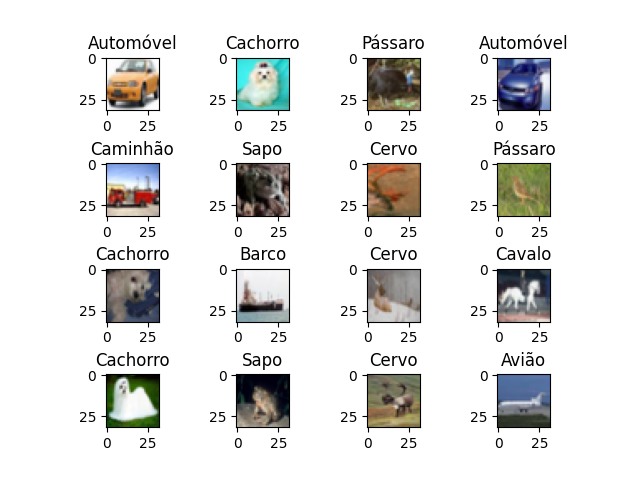

In [6]:
SAMPLE_IMAGES = _sample_images(xtrain, ytrain, 16)

PLT_ROWS, PLT_COLS, PLT_INDEX = 4, 4, 1

fig = plt.Figure(figsize=(8, 8))

for p in SAMPLE_IMAGES:
    plt.subplot(PLT_ROWS, PLT_COLS, PLT_INDEX)
    plt.title(CLASSES[p[1][0]])
    plt.imshow(p[0])
    PLT_INDEX += 1

plt.subplots_adjust(wspace=0.25, hspace=1.0)
plt.show()

## 2) Implementação do Modelo MLP

### 2.1 Arquitetura

 - Defina uma arquitera MLP utilzando a API Sequencial do Keras. <br>
   Obs: Não é permitido o uso de camadas convolucionais!
 
 
 - A escolha de parâmetros do modelo, como, por exemplo, *quantidade de camadas ocultas*, *quantidade de neurônios*, *funções de ativação*, fica a critério do projetista. 


 - Apresente um resumo da arquitetura implementada.

In [96]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

\# xtrain ------------------------------------------------------------- #

In [8]:
num, h, w, c = xtrain.shape
xtrain = xtrain.reshape(num, -1)
xtrain.shape

(50000, 3072)

In [9]:
xtrain = xtrain.astype('float32')
xtrain /= 255

\# xtest -------------------------------------------------------------- #

In [10]:
num, h, w, c = xtest.shape
xtest = xtest.reshape(num, h*w*c)
xtest.shape

(10000, 3072)

In [11]:
xtest = xtest.astype('float32')
xtest /= 255

\# ytrain, ytest ------------------------------------------------------ #

In [13]:
ytrain = np_utils.to_categorical(ytrain, len(CLASSES))
ytest = np_utils.to_categorical(ytest, len(CLASSES))

\# modelo ------------------------------------------------------------- #

In [27]:
def modelo_cifar10():
    _dim = xtrain.shape[1]
    clf = Sequential()
    clf.add(Dense(units=3072, activation='relu',input_dim=_dim))
    clf.add(Dense(units=len(CLASSES), activation='softmax'))
    clf.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
    print(clf.summary())
    return clf

clf = modelo_cifar10()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________
None


### 2.2 Compilação

 - Baseado no problema descrito, defina a função custo que será otimizada, e qual otimizador será utilizado.
 
 
 - Defina também quais métricas serão avaliadas pelo modelo durante a etapa de treinamento e de validação.

**Função de custo**: *Categorical Crossentropy*

**Otimizador**: *Stochastic Gradient Descent*

**Métricas**: Acurácia

### 2.3 Treinamento e Validação 
 
 - Defina a quantidade máxima de épocas para o treinamento.
 
 
 - Utilize alguma rotina de *callback* para que o treinamento não dure o máximo de épocas definido, caso isso não seja necessário.

 
 - Utilize, também, uma rotina de *callback* que salve o binário do modelo que obteve melhor acurácia na base de validação, durante as épocas de treinamento.


 - Utilize 20% da base de treino para validar o modelo a cada época.  <br>
   (Consulte os parametros do método *fit*).


 - Mostre em um gráfico o comportamento da função custo (*loss*) e da acurácia, ao longo das epócas, para as bases de treino e de validação.
 
 
 - O modelo deve atingir um mínimo de **50%** de acurácia média na base de teste. <br>
   Caso não atinja essa meta, revise a arquitetura definida.

In [97]:
es = EarlyStopping(monitor='loss',
                   min_delta=1e-10,
                   patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='cifar10-weights.h5',
                      save_best_only=True,
                      monitor='loss',
                      verbose=1)

In [106]:
clf_history = clf.fit(x=xtrain, y=ytrain,
                      batch_size=240, epochs=10,
                      validation_data=(xtest, ytest),
                      validation_split=0.2,
                      callbacks=[es, mcp])

Epoch 1/10
167/167 [==============================] - 6s 37ms/step - loss: 0.9455 - accuracy: 0.6889 - val_loss: 1.1081 - val_accuracy: 0.6201

Epoch 00001: loss improved from 0.96950 to 0.94545, saving model to cifar10-weights.h5
Epoch 2/10
167/167 [==============================] - 6s 37ms/step - loss: 0.9400 - accuracy: 0.6923 - val_loss: 1.1051 - val_accuracy: 0.6226

Epoch 00002: loss improved from 0.94545 to 0.94002, saving model to cifar10-weights.h5
Epoch 3/10
167/167 [==============================] - 6s 38ms/step - loss: 0.9371 - accuracy: 0.6943 - val_loss: 1.1027 - val_accuracy: 0.6227

Epoch 00003: loss improved from 0.94002 to 0.93708, saving model to cifar10-weights.h5
Epoch 4/10
167/167 [==============================] - 6s 38ms/step - loss: 0.9345 - accuracy: 0.6948 - val_loss: 1.1038 - val_accuracy: 0.6248

Epoch 00004: loss improved from 0.93708 to 0.93451, saving model to cifar10-weights.h5
Epoch 5/10
167/167 [==============================] - 6s 38ms/step - loss: 0

In [107]:
def plot_history(history):
    plt.figure(figsize=(8,4))
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplots_adjust(wspace=0.25, hspace=1.0, bottom=0.2)
    plt.show()

<IPython.core.display.Javascript object>


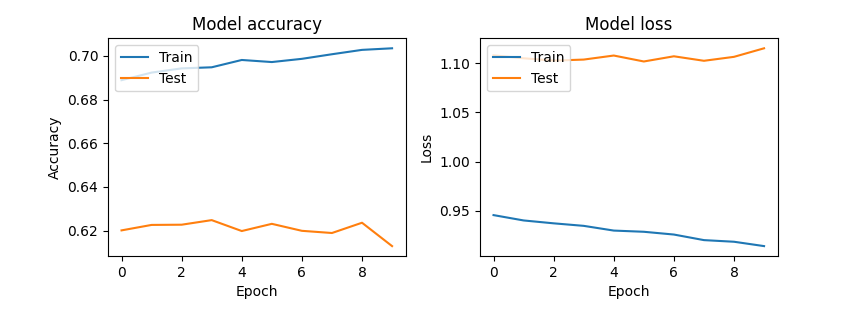

In [108]:
plot_history(clf_history)

### 2.4 Desempenho na Base de Teste

 - Realize, com o modelo treinado, predições na base de teste (método *predict*).
 

 - Com as predições, calcule a precisão e a revocação para cada classe.  <br>
   (Pode ser utilizada a função *classification_report* do *scikit-learn* ou alguma outra similar).

In [172]:
from sklearn.metrics import classification_report, recall_score, precision_score

In [173]:
clf.evaluate(x=xtest, y=ytest)

313/313 [==============================] - 1s 4ms/step - loss: 1.2808 - accuracy: 0.5478


[1.2808270454406738, 0.5478000044822693]

In [174]:
LIMIAR = 0.5

In [175]:
pred = clf.predict(xtest)

In [176]:
pred_argmax = [np.argmax(x) for x in (pred > LIMIAR)]

In [177]:
ytest_argmax = [np.argmax(x) for x in ytest]

In [178]:
print(classification_report(y_true=ytest_argmax, y_pred=pred_argmax))

              precision    recall  f1-score   support

           0       0.16      0.77      0.26      1000
           1       0.75      0.57      0.65      1000
           2       0.57      0.31      0.40      1000
           3       0.52      0.14      0.22      1000
           4       0.79      0.14      0.24      1000
           5       0.61      0.28      0.38      1000
           6       0.76      0.40      0.52      1000
           7       0.75      0.48      0.59      1000
           8       0.72      0.65      0.68      1000
           9       0.67      0.57      0.61      1000

    accuracy                           0.43     10000
   macro avg       0.63      0.43      0.46     10000
weighted avg       0.63      0.43      0.46     10000



In [179]:
prec = precision_score(y_true=ytest_argmax, y_pred=pred_argmax, average='micro')
recall = recall_score(y_true=ytest_argmax, y_pred=pred_argmax, average='micro')

In [180]:
print(f'# Modelo para base CIFAR-10:\n\nPrecisão: {prec*100:.2f}%\nRevocação: {recall*100:.2f}%')

# Modelo para base CIFAR-10:

Precisão: 42.98%
Revocação: 42.98%
